<a href="https://colab.research.google.com/github/AruntejaLonka/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members:** 1) ArunTeja Lonka  2) Upasana Kumari  3) Zunaid  4) Sukesh shetty

 **Problem Statement:**
 The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [97]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing Libraries**

In [98]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [99]:
#copy the data set path
path  = "/content/drive/MyDrive/Data sets/data_cardiovascular_risk (1).csv"

# **Loading Dataset and Analysing**

In [100]:
df = pd.read_csv(path)

In [101]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [102]:
#Identify different charachteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [103]:
#Check the Statistical discription of numerical value in dataset
#Crunch the numbers   
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


## **Missing/NULL Values Treatment**

Looking for the lost souls
Why look for the null values? - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

Few doubts that pop up in our analytical minds are...

How ubiquitous are the missing values?
Are they random?
Do they show a pattern?

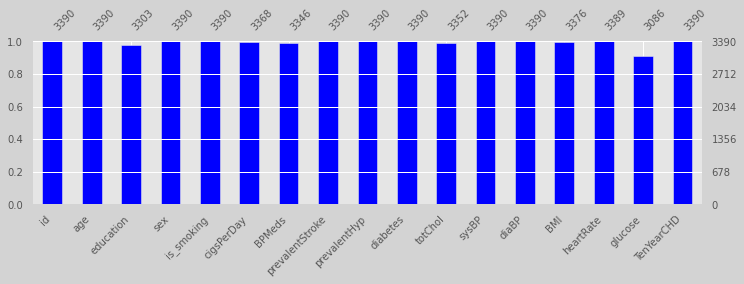

In [104]:
#Visualize the missing values
import missingno as msno
plt.figure(facecolor='lightgray')
msno.bar(df,color='blue',figsize=[12,3],fontsize=10)
plt.show()

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [105]:
#Dig into the count and percentages
tot_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()* 100 / len(df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03
id,0,0.00
diaBP,0,0.00
sysBP,0,0.00


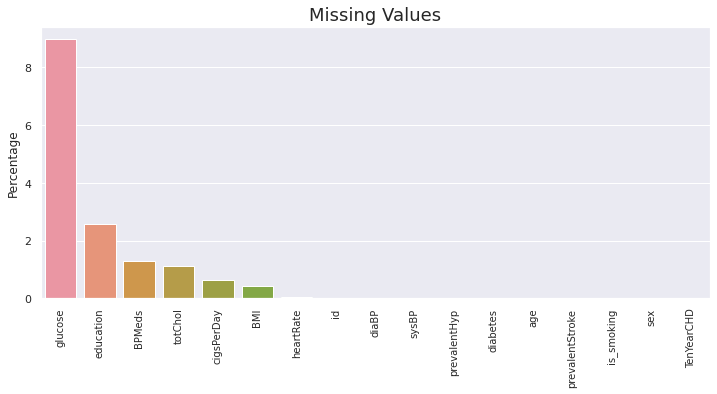

In [106]:
#Visualize the numbers
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 18)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize =10, rotation=90)
plt.show()

Mmmmm...magnificent! This reveals columns "glucose" , "education","BPMeds" , 'totChol', "cigsPerDay", and "BMI".
only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

In [107]:
df = df.fillna({'glucose':(df['glucose'].mean()),
                'education':1,
                'BPMeds':0,
                'totChol':(df['totChol'].mean()),
                'cigsPerDay':0,
                "BMI":(df['BMI'].mean()),
                'heartRate':(df['heartRate'].mean())
                })


In [108]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [110]:
#Kick out the misfits
df.drop(['id'],axis=1,inplace=True)

Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy!

But, One more step to go...

Bringing in the most wanted!

In [111]:
#Shows the required data
list(df.columns)

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [112]:
indep = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [113]:
dep = ['TenYearCHD']

# **Explanatory Data Analysis**

In [114]:
#Storing all the features which has continuous values
continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [115]:
other_variables = ['education','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

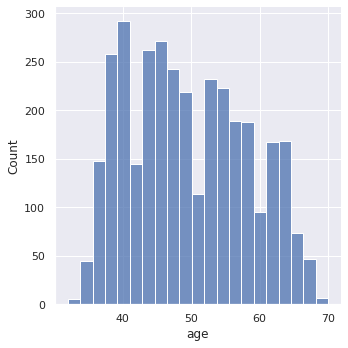

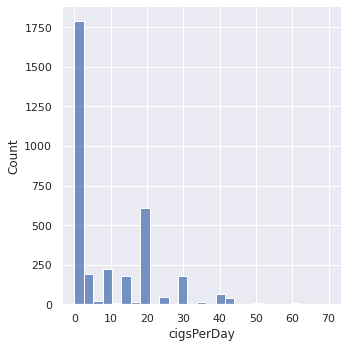

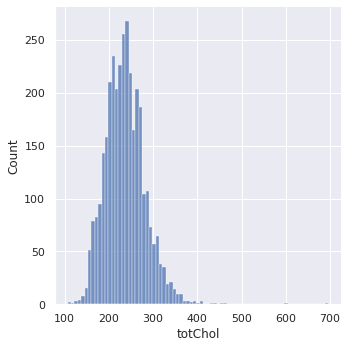

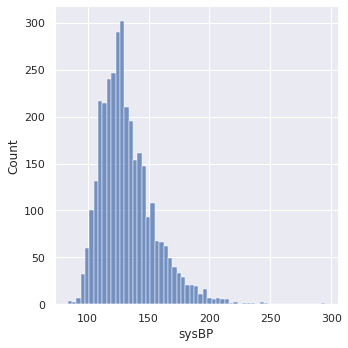

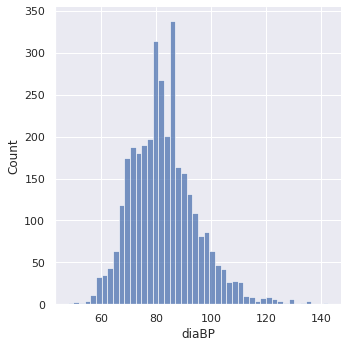

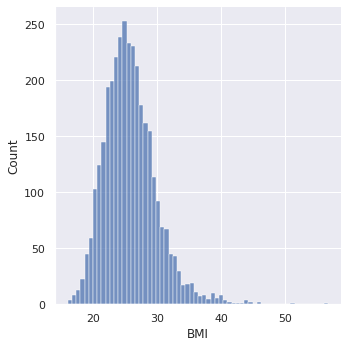

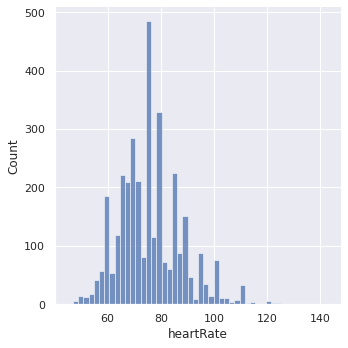

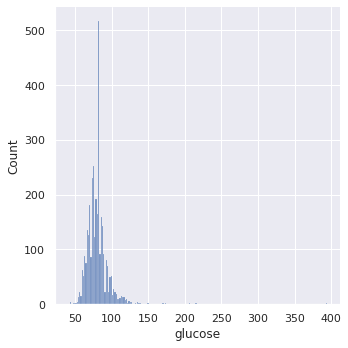

In [116]:
#Analyzing the distribution of all the features which has continuous values
for col in continuous_variables:
  sns.displot(df[col])
plt.show()

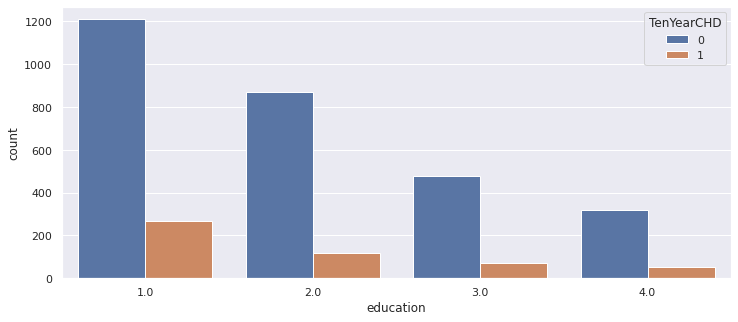

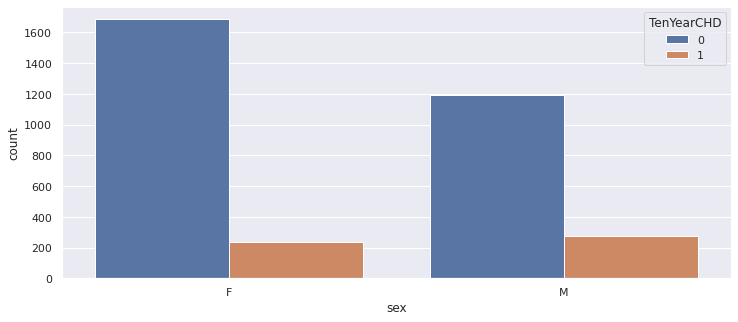

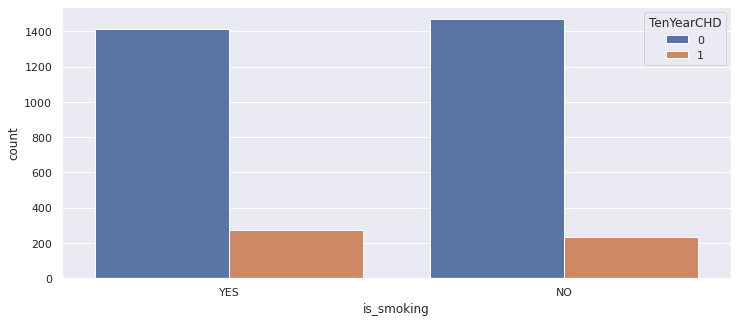

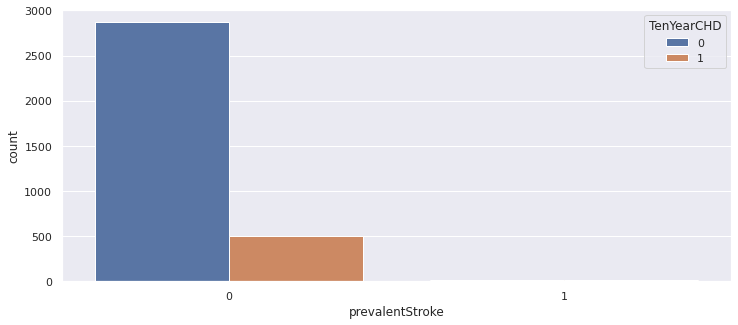

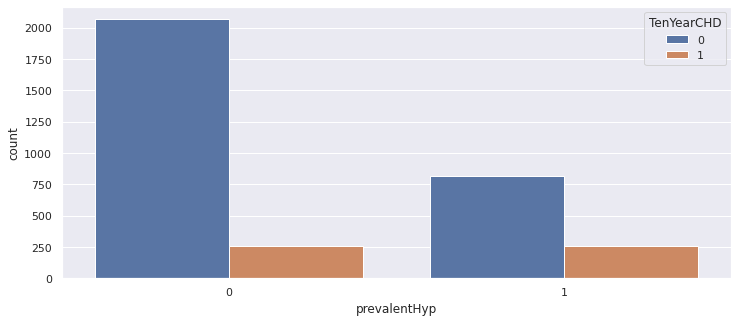

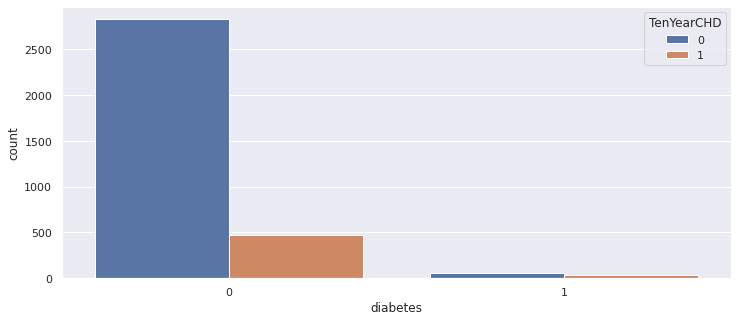

In [117]:
#Counting all the encoded values where dependent variable is the parameter
for col in other_variables:
  sns.countplot(x=df[col],hue=df['TenYearCHD'],data=df)
  plt.show()

# Handling Outliers

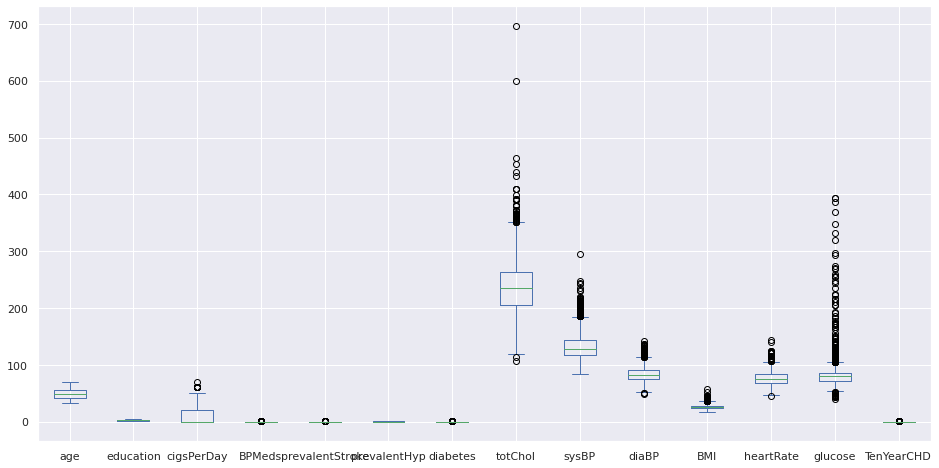

In [118]:
#Box Plot for analyzing the outliers
df.plot(kind='box',figsize=(16,8))

In [119]:
#Stored all the features where we want to remove outliers
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

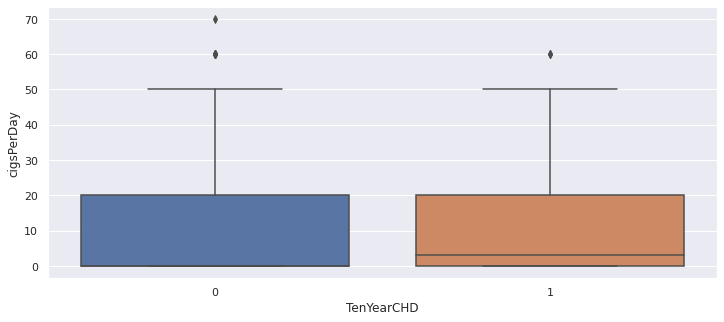

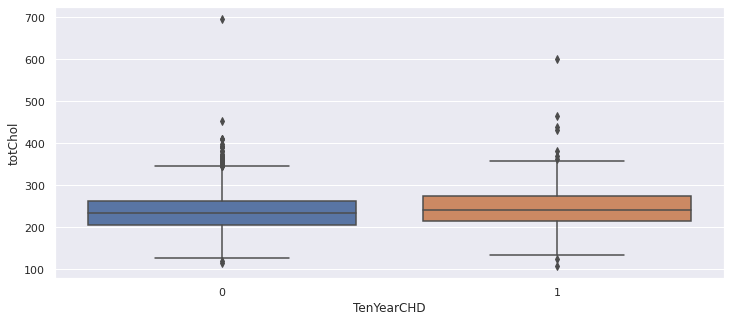

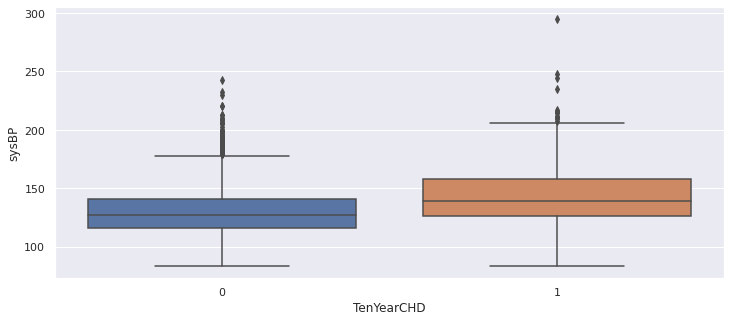

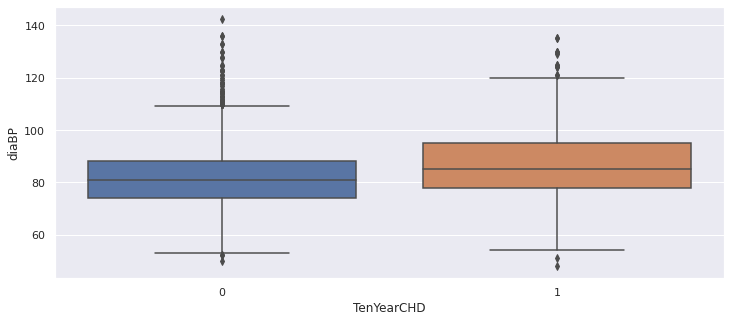

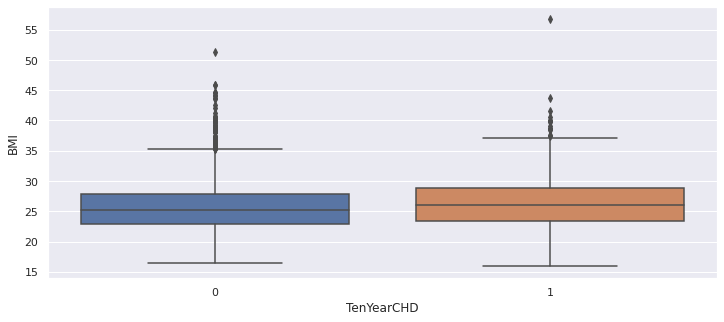

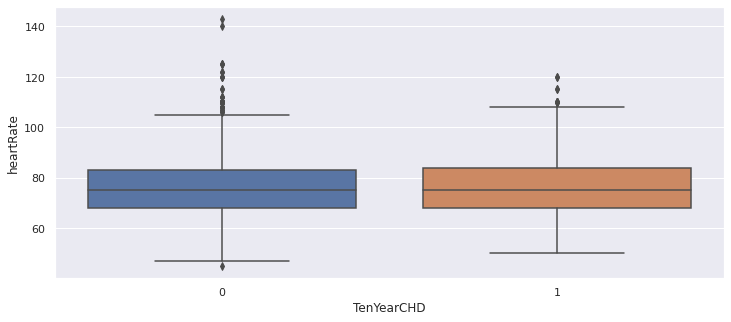

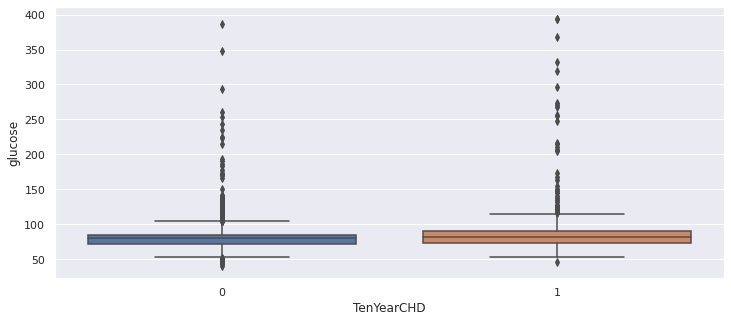

In [120]:
#Analyzing the outlier columns
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

In [121]:
#Handling Outliers
df[outlier_col]=df[outlier_col].clip(lower=df[outlier_col].quantile(0.15),upper=df[outlier_col].quantile(0.85),axis=1)

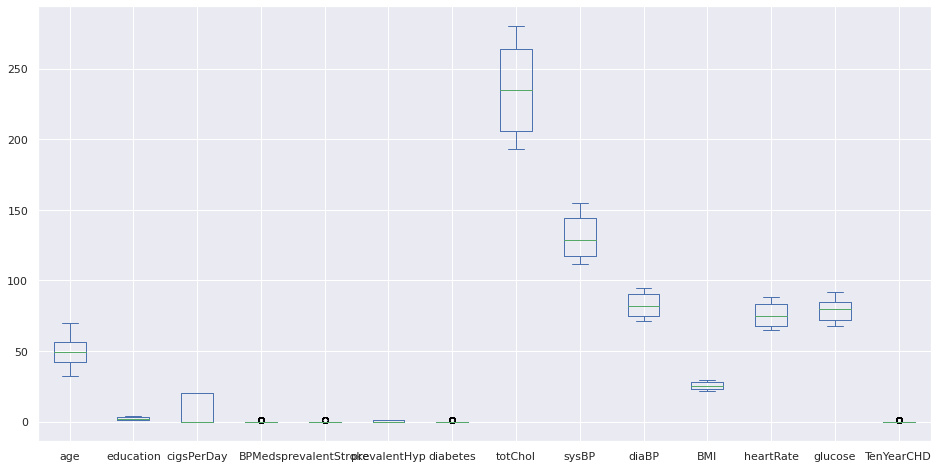

In [122]:
#Box plot after handling outliers
df.plot(kind='box',figsize=(16,8))

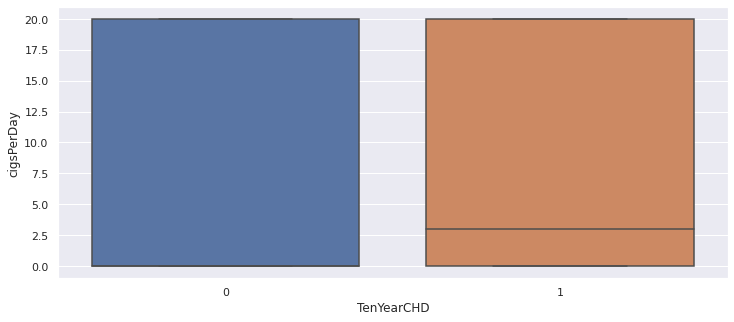

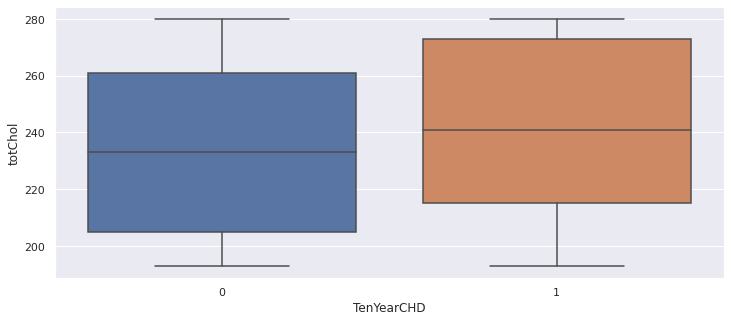

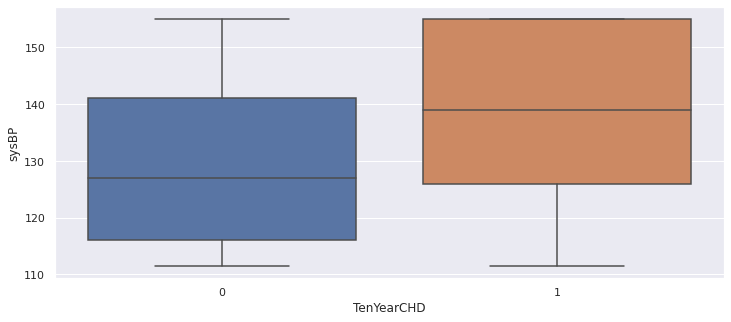

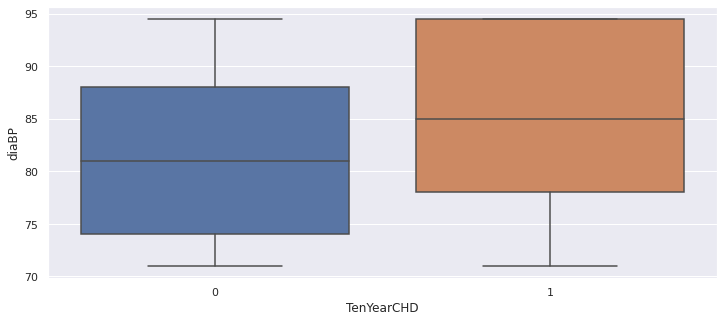

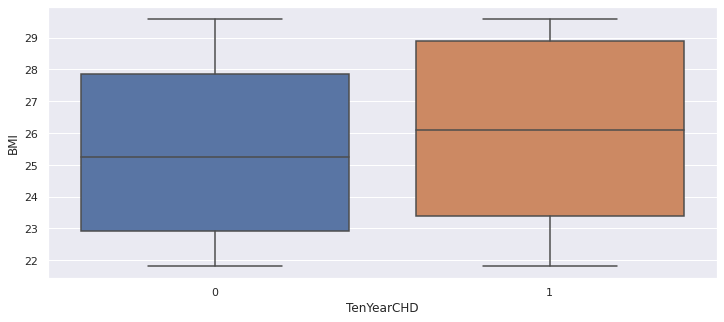

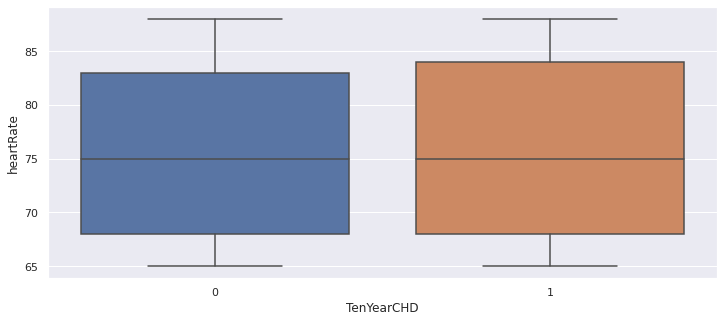

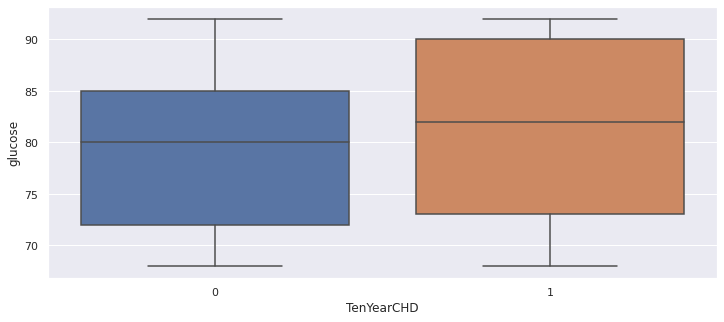

In [123]:
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

# Multicollinearity & Feature Selection

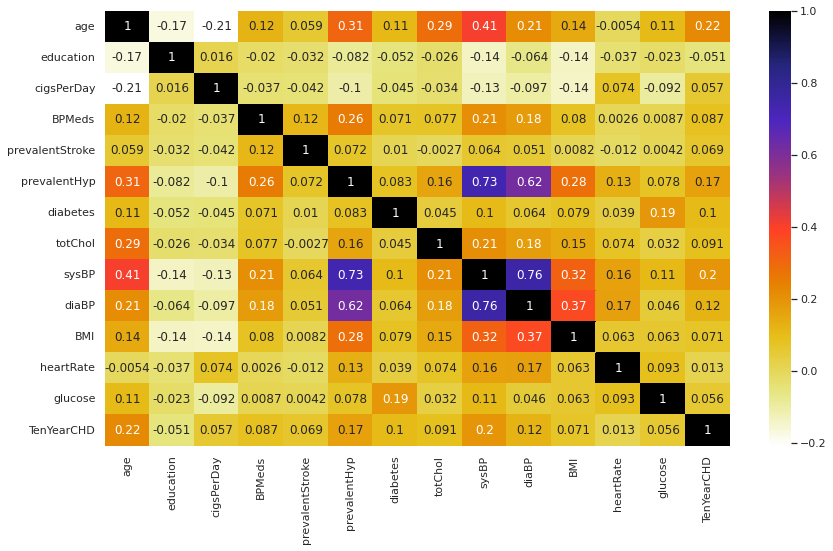

In [124]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [125]:
import numpy as np# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [126]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

2

In [127]:
corr_features

{'diaBP', 'sysBP'}

In [128]:
df_copy = df.drop(corr_features,axis=1)


In [129]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,88.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,155.0,94.5,29.590000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,21.820000,88.0,92.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,155.0,88.0,28.260000,68.0,92.0,1
4,64,1.0,F,YES,20.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,92.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,111.5,71.0,21.960000,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,280.0,155.0,94.5,28.920000,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,193.0,155.0,94.5,23.010000,80.0,85.0,0


In [130]:
df_copy

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,25.794964,88.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,29.590000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,21.820000,88.0,92.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,28.260000,68.0,92.0,1
4,64,1.0,F,YES,20.0,0.0,0,0,0,241.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,29.280000,70.0,92.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,21.960000,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,280.0,28.920000,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,193.0,23.010000,80.0,85.0,0


# Label Encoding

In [131]:
#Mapping the Variables
df_copy['is_smoking']=df_copy['is_smoking'].map({'YES':1,'NO':0})
df_copy['sex']=df_copy['sex'].map({'M':0,'F':1})

In [132]:
X = df_copy.iloc[:,0:-1].values
y=df_copy['TenYearCHD'].values

In [133]:
df_copy.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,25.794964,88.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,29.590000,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,21.820000,88.0,92.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,28.260000,68.0,92.0,1
4,64,1.0,1,1,20.0,0.0,0,0,0,241.0,26.420000,70.0,77.0,0


# Splitting & Scaling data

In [134]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((2712, 13), (678, 13))

In [135]:
#Checking the shape of our training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2712, 13)
(678, 13)
(2712,)
(678,)


In [136]:
#Using Standard Scaler to scale 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [137]:
X.shape,y.shape

((3390, 13), (3390,))

# Implementing Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [206]:
#Fitting the training datasets
Log.fit(X_train,y_train)

LogisticRegression()

In [207]:
#predicting on training dataset
y_pred_log_train = Log.predict(X_train)

In [208]:
#predicting on testing dataset
y_pred_log_test = Log.predict(X_test)

## Classification Evaluation Metrics on Logistic Regression.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [209]:
#Accuracy score of training
log_acc_train = accuracy_score(y_train,y_pred_log_train)*100
log_acc_train

85.50884955752213

In [210]:
#Classification Report of training
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2305
           1       0.67      0.07      0.12       407

    accuracy                           0.86      2712
   macro avg       0.76      0.53      0.52      2712
weighted avg       0.83      0.86      0.80      2712



In [212]:
#Classification report of testing
print(classification_report(y_test,y_pred_log_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       574
           1       0.73      0.08      0.14       104

    accuracy                           0.85       678
   macro avg       0.79      0.54      0.53       678
weighted avg       0.84      0.85      0.80       678



AS our data is highly imbalance so we have to improve this

# Using Smotek Technique

In [142]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [143]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=60)
X_res,y_res=smk.fit_resample(X,y)

In [144]:
X_res.shape,y_res.shape,X.shape,y.shape

((5658, 13), (5658,), (3390, 13), (3390,))

##Splitting & scaling data after Smotek Technique

In [145]:
#Splitting the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.30, random_state=300)

In [146]:
X_train_res.shape,y_train_res.shape

((3960, 13), (3960,))

In [147]:
#Scaling the data
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test_res)

In [148]:
X_train_res.shape,y_train_res.shape

((3960, 13), (3960,))

# Implementing Logistic Regression after using Smotek Technique

In [149]:
model_smotek = LogisticRegression()

In [150]:
model_smotek.fit(X_train_res,y_train_res)

LogisticRegression()

In [151]:
y_pred_smotek_train = model_smotek.predict(X_train_res) 

In [152]:
y_pred_smotek_test = model_smotek.predict(X_test_res) 

In [256]:
#Accuaracy score of training
log_acc_train = accuracy_score(y_train_res,y_pred_smotek_train)*100
log_acc_train

67.62626262626263

In [259]:
#Accuaracy score of training
log_acc_test = accuracy_score(y_test_res,y_pred_smotek_test)*100
log_acc_test

67.78563015312132

In [154]:
#Classification report of training
print(classification_report(y_train_res,y_pred_smotek_train))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1974
           1       0.67      0.69      0.68      1986

    accuracy                           0.68      3960
   macro avg       0.68      0.68      0.68      3960
weighted avg       0.68      0.68      0.68      3960



In [155]:
#Classification report of testing
print(classification_report(y_test_res,y_pred_smotek_test))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       855
           1       0.67      0.69      0.68       843

    accuracy                           0.68      1698
   macro avg       0.68      0.68      0.68      1698
weighted avg       0.68      0.68      0.68      1698



In [262]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [269]:

# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
train_tree =tree_cv.fit(X_train_res, y_train_res)
test_tree = tree_cv.fit(X_test_res,y_test_res)
#predicting on training & testing datasets
tree_pred_train = tree_cv.predict(X_train_res)
tree_pred_test = tree_cv.predict(X_test_res)
#Accuracy score, confusion matrix and classification report of training
tree_acc_train = accuracy_score(y_train_res,tree_pred_train)*100
print(tree_acc_train)
print(confusion_matrix(y_train_res,tree_pred_train))
print(classification_report(y_train_res,tree_pred_train))


  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters for traing: {}".format(train_tree.best_params_))
print(" traing set Best score is {}".format(train_tree.best_score_))
print("Tuned Decision Tree Parameters for traing: {}".format(test_tree.best_params_))
print(" test set Best score is {}".format(test_tree.best_score_))



78.96464646464646
[[1521  453]
 [ 380 1606]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1974
           1       0.78      0.81      0.79      1986

    accuracy                           0.79      3960
   macro avg       0.79      0.79      0.79      3960
weighted avg       0.79      0.79      0.79      3960

Tuned Decision Tree Parameters for traing: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
 traing set Best score is 0.8121325698420963
Tuned Decision Tree Parameters for traing: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
 test set Best score is 0.8121325698420963


##**RANDOM FOREST**

In [156]:
from sklearn.ensemble import  RandomForestClassifier

In [233]:

rfc = RandomForestClassifier(max_depth=4, random_state=20)
#Fitting Random Forest Classifier on training dataset
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=4, random_state=20)

In [234]:
#predicting on training & testing datasets
rfc_pred_train = rfc.predict(X_train_res)
rfc_pred_test = rfc.predict(X_test_res)

In [235]:
#Accuracy score, confusion matrix and classification report of training
rfc_acc_train = accuracy_score(y_train_res,rfc_pred_train)*100
print(rfc_acc_train)
print(confusion_matrix(y_train_res,rfc_pred_train))
print(classification_report(y_train_res,rfc_pred_train))

80.85858585858587
[[1568  406]
 [ 352 1634]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1974
           1       0.80      0.82      0.81      1986

    accuracy                           0.81      3960
   macro avg       0.81      0.81      0.81      3960
weighted avg       0.81      0.81      0.81      3960



In [236]:
#Accuracy score, confusion matrix and classification report of testing
rfc_acc_test = accuracy_score(y_test_res,rfc_pred_test)*100
print(rfc_acc_test)
print(confusion_matrix(y_test_res,rfc_pred_test))
print(classification_report(y_test_res,rfc_pred_test))

79.0341578327444
[[673 182]
 [174 669]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       855
           1       0.79      0.79      0.79       843

    accuracy                           0.79      1698
   macro avg       0.79      0.79      0.79      1698
weighted avg       0.79      0.79      0.79      1698



In [237]:
roc_auc_score(y_test_res,rfc_pred_test)

0.7903644044868994

## KNN

In [162]:
from pandas.core.common import random_state
# Import KNeighborsClassifier  #X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=0)
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,leaf_size=30,weights="uniform")
    
    # Fit the model
    knn.fit(X_train_res, y_train_res)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_res, y_train_res)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_res, y_test_res) 

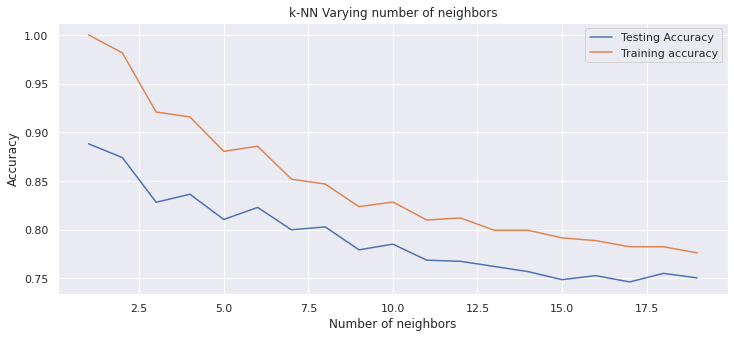

In [163]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [164]:

# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=12)

In [165]:
# Fit the model
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=12)

In [166]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [167]:
# Let us get the predictions using the classifier we had fit above
y_pred_test = knn.predict(X_test_res)
y_pred_train = knn.predict(X_train_res)

In [168]:
#Accuracy score, confusion matrix and classification report of training 
knn_acc_train = accuracy_score(y_train_res,y_pred_train)*100
print(knn_acc_train)
print(confusion_matrix(y_train_res,y_pred_train))
print(classification_report(y_train_res,y_pred_train))

81.18686868686868
[[1509  465]
 [ 280 1706]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1974
           1       0.79      0.86      0.82      1986

    accuracy                           0.81      3960
   macro avg       0.81      0.81      0.81      3960
weighted avg       0.81      0.81      0.81      3960



In [169]:
#Accuracy score, confusion matrix and classification report of testing
knn_acc_test = accuracy_score(y_test_res,y_pred_test)*100
print(rfc_acc_test)
print(confusion_matrix(y_test_res,y_pred_test))
print(classification_report(y_test_res,y_pred_test))

80.6831566548881
[[611 244]
 [151 692]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.76       855
           1       0.74      0.82      0.78       843

    accuracy                           0.77      1698
   macro avg       0.77      0.77      0.77      1698
weighted avg       0.77      0.77      0.77      1698



In [170]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

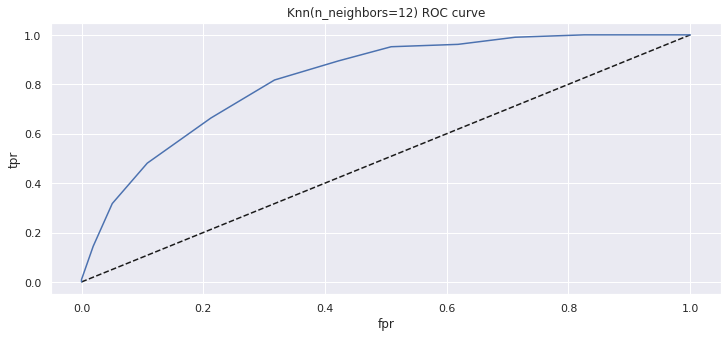

In [172]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=12) ROC curve')
plt.show()

In [173]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8224420396676494

# Implementing Support Vector Machine

In [183]:
from sklearn.svm import SVC

In [184]:
svc = SVC(C=100,gamma=0.001,kernel='rbf')

In [185]:
#Fitting SVM on training dataset
svc.fit(X_train_res,y_train_res)

SVC(C=100, gamma=0.001)

In [186]:

#predicting on training dataset
y_pred_train_svm = svc.predict(X_train_res)

In [187]:

#predicting on testing dataset
y_pred_test_svm = svc.predict(X_test_res)

## Classification Evaluation Metrics on SVM.

In [188]:
#Accuracy score, confusion matrix and classification report of training 
acc_svm_train= accuracy_score(y_pred_train_svm,y_train_res)*100
print(acc_svm_train)
cmm = confusion_matrix(y_pred_train_svm,y_train_res)
print(cmm)
crr = classification_report(y_pred_train_svm,y_train_res)
print(crr)

72.55050505050505
[[1365  478]
 [ 609 1508]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1843
           1       0.76      0.71      0.74      2117

    accuracy                           0.73      3960
   macro avg       0.73      0.73      0.73      3960
weighted avg       0.73      0.73      0.73      3960



In [238]:
#Accuracy score, confusion matrix and classification report of testing
acc_svm_test = accuracy_score(y_test_res,y_pred_test_svm)*100
print(acc_svm_test)
print(confusion_matrix(y_pred_test_svm,y_test_res))
print(classification_report(y_pred_test_svm,y_test_res))

71.08362779740872
[[580 216]
 [275 627]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       796
           1       0.74      0.70      0.72       902

    accuracy                           0.71      1698
   macro avg       0.71      0.71      0.71      1698
weighted avg       0.71      0.71      0.71      1698



# Hyperparameter tuning using GridSearchCV on SVM

In [190]:
from sklearn.model_selection import GridSearchCV

In [244]:
from sklearn.metrics.pairwise import linear_kernel
#Making a parameters dict where all parameters is of SVM
param_grid={'C':[0.1,1,8,10,12,16,20,30,50,80,100,1000],'gamma':[1,0.1,0.001,0.0001],'kernel':['rbf','linear_kernel']}

In [245]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=100)

In [246]:
#Fitting on training dataset
grid.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/96] END ..C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.8s
[CV 2/5; 1/96] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/96] END ..C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.8s
[CV 3/5; 1/96] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/96] END ..C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   0.8s
[CV 4/5; 1/96] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/96] END ..C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.8s
[CV 5/5; 1/96] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/96] END ..C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.8s
[CV 1/5; 2/96] START C=0.1, gamma=1, kernel=linear_kernel.......................
[CV 1/5; 2/96] END C=0.1, gamma=1, kernel=linea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 8, 10, 12, 16, 20, 30, 50, 80, 100,
                               1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear_kernel']},
             verbose=100)

In [248]:
#getting the best parameters
grid.best_params_

{'C': 8, 'gamma': 1, 'kernel': 'rbf'}

In [249]:
svc_2 = SVC(C=8,gamma=1,kernel='rbf')

In [250]:
#Fitting on training dataset using the best parameters
svc_2.fit(X_train_res,y_train_res)

SVC(C=8, gamma=1)

In [251]:
#predicting on training and testing dataset after using the best parameters
y_pred_train_svm_grid = svc_2.predict(X_train_res)
y_pred_test_svm_grid = svc_2.predict(X_test_res)

## Classification Evaluation Metrics on SVM after Hyperparameter tuning

In [252]:
#Accuracy score, confusion matrix and classification report of training 
acc_svm_train_grid = accuracy_score(y_train_res,y_pred_train_svm_grid)*100
print(acc_svm_train_grid)
cmm_svm_train_grid = confusion_matrix(y_pred_train_svm_grid,y_train_res)
print(cmm_svm_train_grid)
crr_svm_train_grid = classification_report(y_pred_train_svm_grid,y_train_res)
print(crr_svm_train_grid)

99.8989898989899
[[1970    0]
 [   4 1986]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      1.00      1.00      1990

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960



In [253]:
#Accuracy score, confusion matrix and classification report of testing
acc_svm_test_grid = accuracy_score(y_test_res,y_pred_test_svm_grid)*100
print(acc_svm_test_grid)
print(confusion_matrix(y_pred_test_svm_grid,y_test_res))
print(classification_report(y_pred_test_svm_grid,y_test_res))

89.2226148409894
[[758  86]
 [ 97 757]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       844
           1       0.90      0.89      0.89       854

    accuracy                           0.89      1698
   macro avg       0.89      0.89      0.89      1698
weighted avg       0.89      0.89      0.89      1698



# Comparision of evaluation metrics of the models being used

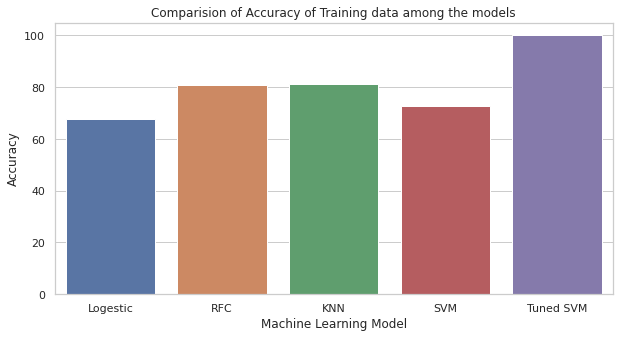

In [257]:
models = ['Logestic','RFC','KNN','SVM','Tuned SVM']
acc = [log_acc_train,rfc_acc_train,knn_acc_train,acc_svm_train,acc_svm_train_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.title('Comparision of Accuracy of Training data among the models')
plt.show()

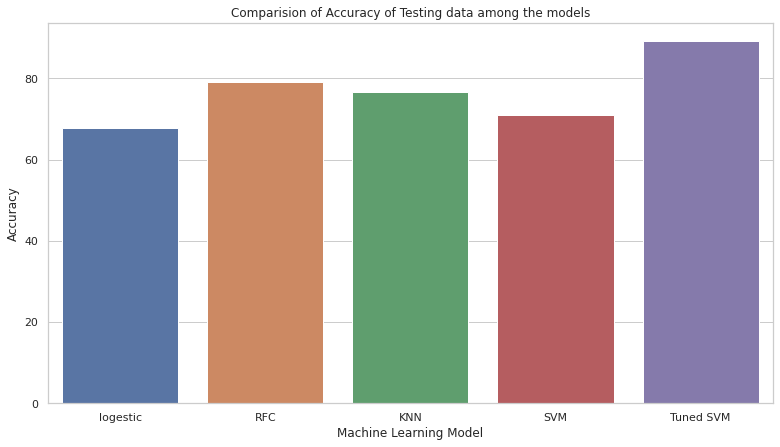

In [260]:
models = ['logestic','RFC','KNN','SVM','Tuned SVM']
acc = [log_acc_test,rfc_acc_test,knn_acc_test,acc_svm_test,acc_svm_test_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.title('Comparision of Accuracy of Testing data among the models')
plt.show()